# Google Drive をマウントする

In [1]:
# 必要なライブラリを読み込む
from google.colab import drive 

# Google ドライブをマウントする
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


必要なモジュールをインポートします。

*   pandas：表データの前処理・集計に便利な型「データフレーム」を提供してくれるライブラリ
*   sklearn：Scikit-learn。pythonで機械学習を実行するために便利なモジュールを集めてあるパッケージ。今回は以下のモジュールを使用する。
> *   model_selection：モデル構築を実施する際に便利なモジュールがいくつか用意されています。今回はtrain_test_split（データを訓練用データと検証用データに分解する）をインポートします。
> *   tree：木構造のモデル構築に必要なモジュールがいくつか用意されています。今回はDecisionTreeClassifier（分類課題用の決定木モデル）、export_graphviz（Graphvizが扱える形で決定木のグラフをエクスポートする）をインポートします。
> *   metrics：モデル憲章を実施する際に便利なモジュールがいくつか用意されています。今回はaccuracy_score（正解率計算用モジュール）とconfusion_matrix（混合行列作成用モジュール）、roc_curve（ROC曲線作成用モジュール）、auc（AUC計算用モジュール）をインポートします。
*   imblearn：不均衡データを分析するために使われるライブラリ
> *   under_sampling：アンダーサンプリングを実施するためのモジュール。RandomUnderSamplerというメソッドが実装されている。
*   matplotlib：pythonでグラフ描画に使われるライブラリ
*   seaborn：pythonでグラフ描画に使われるライブラリ（matplotlibより美しい）
*   graphviz：pythonでgraphvizを扱うためのパッケージ、今回はSource（DOT形式のデータを描画する）をインポートします。

In [2]:
# 必要なライブラリを読み込む

# データフレームが扱えるよう、pandas をインポート
import pandas as pd

# numpy のデータが扱えるよう、numpy をインポート
import numpy as np

# データ分割を行う便利なモジュール train_test_split をインポート
from sklearn.model_selection import train_test_split

# アンダーサンプリング用ライブラリをインポート
from imblearn.under_sampling import RandomUnderSampler

# データの標準化を行うためのモジュールをインポート
from sklearn.preprocessing import StandardScaler

# 決定木構築用クラスをインポート
from sklearn.tree import DecisionTreeClassifier

# 決定木可視化用モジュール群をインポート
from sklearn.tree import export_graphviz
from graphviz import Source

# ヒストグラムを描くためのモジュールをインポート
import matplotlib.pyplot as plt
import seaborn as sns

# 正解率を作成するためのモジュールをインポート
from sklearn.metrics import accuracy_score

# 混合行列を作成するためのモジュールをインポート
from sklearn.metrics import confusion_matrix

# ROCを作成するためのモジュールをインポート
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 準備

# データ読み込み

あるシステムの状況を1時間おきにモニタリングしているデータになります（machineTrouble.csv）。ここでは、このデータをつかってシステムトラブル（Troubleが1）の発生を予測するという課題に取り組んでいただきます。
*   説明変数（システムのモニタリングデータ）
> *   Instrument1～Instrument48：装置1～48についている計器の値（負荷をモニタリングしています。）
> *   Hub1～17：装置同士を接続しているハブ1～17についている計器の値（負荷をモニタリングしています。）
*   目的変数（システムトラブルの発生）
> *   Trouble：モニタリングのタイミングから1時間以内にシステム上の異常が発生したか否かをフラグ化したもの（1の際にシステム異常が発生）

In [3]:
# システムのモニタリングデータを読み込む
machineTrouble = pd.read_csv("drive/My Drive/DATA-SCI-TECH-EXERCISE/DATA/machineTrouble.csv")
machineTrouble.head()

,SystemID,Instrument1,Instrument2,Instrument3,Instrument4,Instrument5,Instrument6,Instrument7,Instrument8,Instrument9,Instrument10,Instrument11,Instrument12,Instrument13,Instrument14,Instrument15,Instrument16,Instrument17,Instrument18,Instrument19,Instrument20,Instrument21,Instrument22,Instrument23,Instrument24,Instrument25,Instrument26,Instrument27,Instrument28,Instrument29,Instrument30,Instrument31,Instrument32,Instrument33,Instrument34,Instrument35,Instrument36,Instrument37,Instrument38,Instrument39,Instrument40,Instrument41,Instrument42,Instrument43,Instrument44,Instrument45,Instrument46,Instrument47,Instrument48,Hub1,Hub2,Hub3,Hub4,Hub5,Hub6,Hub7,Hub8,Hub9,Hub10,Hub11,Hub12,Hub13,Hub14,Hub15,Hub16,Hub17,Trouble
0,SYS02163966710,123.96,1.099,319.31,12.21,7931.09,6.056,2749.18,23.05,64.521,1022.74,2474.78,389.31,12.62,3738.13,6.051,5413.632,603.27,6017.66,439.710,227.41,56.039,6354.99,28.06,222.911,5074.80,4102.19,856.72,3173.93,11.441,50.01,24.455,24041.81,6.76,67.61,731.31,58.258,44.07,1.119,397.93,56056.92,17.34,206.828,2126.58,0.108,34986.36,0.111,7.40,4375.89,0.134,0.379,0.46,0.68,0.85,0.49,0.58,0.049,0.94,0.20,0.168,0.85,0.87,0.67,0.403,0.19,0.01,0
1,SYS03084177854,119.35,1.112,316.72,15.95,2121.01,7.216,5538.29,21.91,60.097,1136.52,2599.53,370.97,22.07,3522.49,6.373,3745.059,626.52,410.27,278.008,130.43,113.998,7247.99,6.18,137.882,4666.63,2570.16,720.58,91.66,7.955,24.54,17.081,30217.71,10.94,91.07,448.35,51.476,20.97,1.095,520.54,53540.23,45.02,147.304,2359.42,0.121,35683.81,0.133,9.69,2023.61,0.127,0.351,0.24,0.61,0.73,0.43,0.34,0.041,0.78,0.52,0.156,0.99,0.32,0.46,0.331,0.31,0.51,0
2,SYS01466328054,119.38,1.108,329.50,10.80,6811.12,6.059,5567.30,40.24,28.606,903.23,3076.69,336.93,24.68,3492.18,5.301,12708.031,710.49,5922.89,379.735,231.85,34.967,8338.09,7.16,247.971,4405.50,1887.08,780.77,1310.56,6.224,29.75,12.481,24731.61,4.53,52.91,592.34,34.863,22.89,1.095,516.51,56416.50,56.46,134.097,2087.25,0.130,34488.48,0.149,5.83,1917.21,0.106,0.363,0.36,0.78,0.36,0.28,0.31,0.039,0.83,0.61,0.123,1.00,0.33,1.00,0.379,0.38,0.29,0
3,SYS09259268556,117.40,1.104,330.72,11.17,3494.39,6.110,5390.78,37.77,66.864,1102.40,1859.76,377.44,22.92,3798.70,7.098,1227.014,853.62,5548.02,287.096,201.50,80.449,7099.88,13.79,186.555,3979.02,2723.10,636.97,2920.15,8.038,48.07,19.987,22987.46,6.49,191.03,599.41,67.175,41.57,1.118,976.51,64370.27,12.13,111.763,2300.85,0.161,34180.88,0.138,9.35,3600.21,0.122,0.307,0.55,0.49,0.79,0.57,0.78,0.034,0.90,0.37,0.136,0.94,0.49,1.00,0.356,0.27,0.21,0
4,SYS04922251152,118.44,1.104,316.32,12.71,1780.26,10.283,4382.64,38.21,40.328,1500.34,2465.08,301.50,13.16,3574.25,10.198,4869.360,549.64,1421.76,208.030,154.78,42.702,9729.81,11.23,127.111,3193.03,5037.60,675.22,240.46,5.917,21.53,21.984,23516.11,7.83,119.82,548.74,84.649,36.48,1.114,1050.00,47365.83,31.39,195.408,2043.10,0.109,35360.42,0.099,5.82,3088.20,0.154,0.311,0.05,0.78,0.66,0.47,0.59,0.042,0.79,0.47,0.127,0.80,0.50,0.89,0.457,0.40,0.99,0


In [4]:
# 概要を確認
machineTrouble.describe()

,Instrument1,Instrument2,Instrument3,Instrument4,Instrument5,Instrument6,Instrument7,Instrument8,Instrument9,Instrument10,Instrument11,Instrument12,Instrument13,Instrument14,Instrument15,Instrument16,Instrument17,Instrument18,Instrument19,Instrument20,Instrument21,Instrument22,Instrument23,Instrument24,Instrument25,Instrument26,Instrument27,Instrument28,Instrument29,Instrument30,Instrument31,Instrument32,Instrument33,Instrument34,Instrument35,Instrument36,Instrument37,Instrument38,Instrument39,Instrument40,Instrument41,Instrument42,Instrument43,Instrument44,Instrument45,Instrument46,Instrument47,Instrument48,Hub1,Hub2,Hub3,Hub4,Hub5,Hub6,Hub7,Hub8,Hub9,Hub10,Hub11,Hub12,Hub13,Hub14,Hub15,Hub16,Hub17,Trouble
count,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000
mean,119.997982,1.105113,322.882939,12.003611,5081.888750,7.526592,4280.821682,41.013230,59.130555,1239.894181,2184.176365,344.608588,18.090897,3622.083721,7.536204,12328.229210,624.233451,3282.272528,482.892338,204.047236,59.121033,7471.680632,14.914633,168.296436,3879.757119,3841.901669,764.976174,2219.429638,7.551094,23.996371,20.993003,23889.900230,7.008702,123.366961,577.691644,58.963442,36.024137,1.105251,771.390657,58632.650058,25.201446,168.549866,2173.929124,0.138046,34805.383809,0.137978,9.962499,3234.000204,0.138315,0.369853,0.491539,0.652254,0.599687,0.567883,0.500309,0.052034,0.849490,0.398853,0.137914,0.891498,0.499190,0.711208,0.369746,0.299513,0.501068,0.035982
std,1.983602,0.011104,11.936357,2.018746,1994.600252,1.527129,1081.995545,10.024241,24.371488,214.160385,884.285569,42.998826,6.064157,311.435345,1.530530,13692.058742,122.937476,1690.040510,321.467748,45.067530,24.416439,1479.171452,6.654676,90.434506,759.160671,1476.956745,99.939477,1221.294957,1.524949,9.739304,6.553899,3505.819488,2.644138,40.884451,120.354822,24.509468,12.055274,0.011163,277.028350,15403.703228,11.351305,88.790532,168.231981,0.028088,826.488585,0.028172,3.131870,767.928860,0.027946,0.037255,0.285721,0.144767,0.149334,0.273345,0.173370,0.015766,0.050035,0.196158,0.028002,0.087547,0.288458,0.254973,0.037143,0.050480,0.289721,0.186254
min,111.580000,1.065000,278.400000,4.290000,1625.230000,3.390000,2398.870000,5.350000,11.157000,410.140000,659.130000,181.600000,3.690000,3083.620000,3.213000,288.982000,196.210000,320.690000,31.758000,127.150000,12.195000,1407.070000,1.320000,21.981000,796.440000,1278.220000,349.940000,82.160000,3.370000,2.500000,6.768000,10009.440000,0.780000,52.160000,116.020000,12.241000,6.580000,1.066000,286.860000,7623.130000,1.610000,20.531000,1881.550000,0.061000,31527.590000,0.064000,1.730000,1904.130000,0.066000,0.248000,-0.660000,0.400000,0.070000,0.010000,0.200000,0.017000,0.660000,0.020000,0.063000,0.500000,0.000000,0.050000,0.235000,0.110000,0.000000,0.000000
25%,118.660000,1.098000,314.847500,10.640000,3345.810000,6.448000,3343.927500,34.200000,41.758250,1095.245000,1417.855000,315.762500,13.670000,3354.230000,6.446000,4430.668250,538.195000,1827.002500,268.819750,164.855000,41.743750,6474.400000,10.060000,105.873750,3372.425000,2569.725000,697.297500,1173.435000,6.464750,16.870000,16.340750,21550.860000,5.100000,88.077500,495.135000,41.831250,27.360000,1.0

# データ準備
* データ分割（モデル構築用・モデル検証用）
* アンダーサンプリングによる不均衡データ対応
* 標準化

**データ分割**  
モデルを構築をする際はデータを訓練用（モデルのパラメータを決める）と検証用（構築されたモデルに投入して、訓練用データを投入した際の精度と同程度の精度が得られるかを確認する）に分解します。

train_test_split 関数は説明変数と目的変数を投入する事し、全データのうちどの程度の割合を検証用データにするかを指定する事でランダムな分離を行ってくれます。

In [5]:
# 説明変数と目的変数に分離する
columnList = machineTrouble.columns.to_list()
columnList.remove("SystemID")
columnList.remove("Trouble")
X = pd.DataFrame( machineTrouble.loc[:, columnList] )
y = pd.DataFrame( machineTrouble.loc[:, ["Trouble"]] )

# データを訓練用データ・検証用データに分ける（訓練用：検証用＝7:3）
(X_train, X_test ,y_train, y_test) = train_test_split(X, y, test_size = 0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7840, 65)
(7840, 1)
(3360, 65)
(3360, 1)


**アンダーサンプリング**  
不均衡データ（0と1がアンバランス）な場合、比率を調整しておくことで、Precision や Recall が悪いモデルが構築されるのを避ける事ができます。

RandomUnderSampler メソッドは 0 と 1 の比率を予め指定してから、説明変数・目的変数をセットで入力すると、指定した比率にサンプリングしたデータを返してくれます。

In [6]:
# アンダーサンプリングを行う

# 正例の数を保存
positive_count_train = int(y_train["Trouble"].sum())

# 正例が20％になるまで負例をアンダーサンプリング
rus = RandomUnderSampler(ratio={0:positive_count_train*4, 1:positive_count_train}, random_state=1234)

# 学習用データに反映
X_train_rs, y_train_s = rus.fit_sample(X_train, y_train)
X_train_rs = pd.DataFrame(X_train_rs, columns=columnList)
y_train_rs = pd.DataFrame(y_train_s,columns=["Trouble"])
print(rus)
print(X_train_rs.shape)
print(y_train_rs.shape)

RandomUnderSampler(random_state=1234, ratio={0: 1136, 1: 284},
                   replacement=False, return_indices=False,
                   sampling_strategy={0: 1136, 1: 284})
(1420, 65)
(1420, 1)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# モデル構築（線形で実施。カーネルトリックを使わない。）

決定木モデルをつくります。
決定木モデルを作成するときは、以下のパラメータを（一部でいいので）設定する必要があります。
*   class_weight：予測するクラスに対して重要度の重みを付ける場合に使う引数ですが、原則 None（重みは平等）で結構です。
*   criterion：分割を決定するのに用いる不純度を決めます。'gini'ならばジニ係数、'entropy'ならばエントロピーを不純度として用います。
*   max_depth：木の最大深さを決めます。Noneの場合は全ての葉が純粋（単独クラス）になるまで木が成長します。（他のパラメータによって停止される可能性はある）
*   max_features：使用する変数の数の上限を決めます。
*   max_leaf_nodes：最大の葉の数をきめます。ここで指定した葉の数以内で、もっともcriterionが低くなるように木が成長します。
*   min_impurity_decrease：ここで設定した値以上のcriterionの減少を引き起こす場合のみ、ノードは分割されるようになります。（criterionの減少に効果的ではない分割が発生しないようになります。）
*   min_impurity_split：使われなくなった引数です。原則、設定しません。（Scikit-learn 0.19以降）
*   min_samples_leaf：１つの葉に必要なサンプルの最小数。ここで指定するよりも小さなサンプル数になってしまう葉は生成させません。
*   min_samples_split：ノードを分割するために必要なサンプルの最小数。ここで指定するよりも小さなサンプル数のノードは分割されません。
*   min_weight_fraction_leaf：葉に必要な（すべての入力サンプルの）重みの合計の最小加重部分。原則、設定不要です。
*   presort：分割の閾値の発見を早めるためにデータを事前にソートしておくかを決めますが、大きいデータだとソートに時間がかかるため、かえって速度が遅くなる可能性もあります。原則、設定不要です。
*   random_state：分割の閾値を決めるときに乱数をしようする場合があり、その際のシードの値を入力します。（値を定めておくと処理の再現性が得られます）
*   splitter：分割の閾値を決める場合に使うアルゴリズムを選択します。原則、設定不要です。

モデルは訓練用データで構築します（X_train_rs_std、y_train_rs）。

In [7]:
# 決定木分析を実施し、判別モデルを構築する
clf = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=10, random_state=1234)
clf.fit(X_train_rs,y_train_rs)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

# 結果確認

構築されたモデルを確認します。

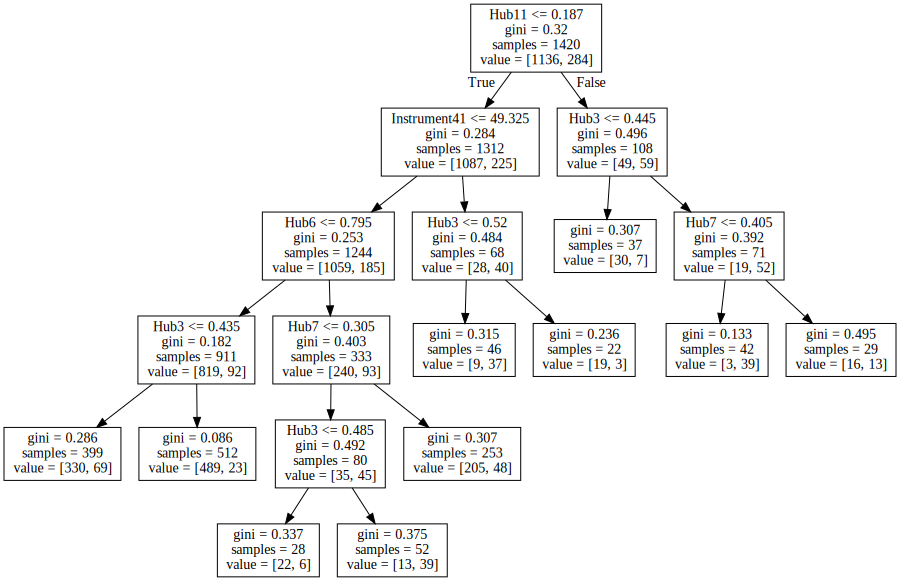

In [8]:
# 構築された決定木を可視化する

Source(export_graphviz(clf, feature_names=columnList))

訓練用データ・検証用データの双方で精度を確認する。
*   正解率を確認する
*   混合行列を確認する

In [9]:
# 精度検証を行う（訓練用データを確認）
print(accuracy_score(y_train_rs, clf.predict(X_train_rs)))
conf_mtrx_df = pd.DataFrame(confusion_matrix(y_train_rs,clf.predict(X_train_rs).reshape(-1,1)))
conf_mtrx_df.rename(columns={0: 'predict(0)',1: 'predict(1)'}, index={0: 'target(0)',1: 'target(1)'})

0.8633802816901408


,predict(0),predict(1)
target(0),1111,25
target(1),169,115


In [10]:
# 精度検証を行う（訓練用データを確認）
print(accuracy_score(y_train, clf.predict(X_train)))
conf_mtrx_df = pd.DataFrame(confusion_matrix(y_train,clf.predict(X_train).reshape(-1,1)))
conf_mtrx_df.rename(columns={0: 'predict(0)',1: 'predict(1)'}, index={0: 'target(0)',1: 'target(1)'})

0.9465561224489796


,predict(0),predict(1)
target(0),7306,250
target(1),169,115


In [11]:
# 精度検証を行う（検証用データを確認）
print(accuracy_score(y_test, clf.predict(X_test)))
conf_mtrx_df = pd.DataFrame(confusion_matrix(y_test,clf.predict(X_test).reshape(-1,1)))
conf_mtrx_df.rename(columns={0: 'predict(0)',1: 'predict(1)'}, index={0: 'target(0)',1: 'target(1)'})

0.9410714285714286


,predict(0),predict(1)
target(0),3120,121
target(1),77,42


AUC(train): 0.7827528631290124
AUC(test): 0.7567368199979776
AUC ratio(train/test): 1.0343792484302592


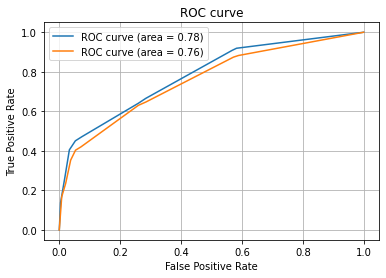

In [12]:
# 精度検証を行う

# 訓練用データについて

# FPR、TPR、（閾値）、AUCを算出
y_train_predict = clf.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)
auc_value_train = auc(fpr_train, tpr_train)
# ROC曲線をプロット
plt.plot(fpr_train, tpr_train, label='ROC curve (area = %.2f)'%auc_value_train)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC(train): "+str(auc_value_train))

# 検証用データについて

# FPR、TPR、（閾値）、AUCを算出
y_test_predict = clf.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_predict)
auc_value_test = auc(fpr_test, tpr_test)
# ROC曲線をプロット
plt.plot(fpr_test, tpr_test, label='ROC curve (area = %.2f)'%auc_value_test)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC(test): "+str(auc_value_test))
print("AUC ratio(train/test): "+str(auc_value_train/auc_value_test))